# Importing the libraries

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Getting and Loading the Training and Validation set

In [2]:
train_path = r"C:\American_Sign_Language_Digit_Classification_Using_CNN\Dataset\train"
validation_path = r"C:\American_Sign_Language_Digit_Classification_Using_CNN\Dataset\validation"

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 12.,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = "categorical")

validation_set = val_datagen.flow_from_directory(validation_path,
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = "categorical")

Found 1650 images belonging to 10 classes.
Found 412 images belonging to 10 classes.


# Building the CNN

## Initalizing the CNN

In [5]:
model = Sequential()

## Adding the First Convolutional and Pooling layer

In [6]:
model.add(Conv2D(32, (3, 3), input_shape = (100, 100, 3), activation = "relu")) 
model.add(MaxPooling2D(pool_size = (2, 2)))

## Adding the second Convolutional and Pooling layer

In [7]:
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

## Adding the third Convolutional and Pooling layer

In [8]:
model.add(Conv2D(128, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

## Adding the forth Convolutional and Pooling layer

In [9]:
model.add(Conv2D(256, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

## Flattening all the layers

In [10]:
model.add(Flatten())

## Adding the first Fully connected and Dropout layer


In [11]:
model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.2))

## Adding the final Fully connected layer

In [12]:
model.add(Dense(units = 10, activation = "softmax"))

# Showing the model summary

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)        

## Compiling the CNN

In [14]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [15]:
# Saving the best model only
checkpoint = ModelCheckpoint(filepath = "model.h5", 
                             monitor = "val_loss", 
                             save_best_only = True, 
                             verbose = 1)

In [16]:
early_stopping = EarlyStopping(monitor = "val_loss", 
                           patience = 10, 
                           verbose = 1,
                           restore_best_weights = True)

## Training the CNN

### Calculating steps_per_epoch and validation_steps

In [17]:
import math

batch_size = 32
training_size = 1650
validation_size = 412

compute_steps_per_epoch = lambda x : int(math.ceil(1. * x / batch_size))
# Ceiling is taken because we do not want to drop the remainder of batch

steps_per_epoch = compute_steps_per_epoch(training_size)
validation_steps = compute_steps_per_epoch(validation_size)

In [18]:
history  = model.fit_generator(training_set,
                              steps_per_epoch = steps_per_epoch,
                              epochs = 100,
                              validation_data = validation_set,
                              validation_steps = validation_steps,
                              callbacks = [checkpoint, early_stopping])

Epoch 1/100
52/52 [==============================] - 17s 329ms/step - loss: 2.3087 - accuracy: 0.0842 - val_loss: 2.3010 - val_accuracy: 0.1019

Epoch 00001: val_loss improved from inf to 2.30101, saving model to model.h5
Epoch 2/100
52/52 [==============================] - 13s 253ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.2994 - val_accuracy: 0.0995

Epoch 00002: val_loss improved from 2.30101 to 2.29942, saving model to model.h5
Epoch 3/100
52/52 [==============================] - 13s 254ms/step - loss: 2.2800 - accuracy: 0.1212 - val_loss: 2.1944 - val_accuracy: 0.2427

Epoch 00003: val_loss improved from 2.29942 to 2.19443, saving model to model.h5
Epoch 4/100
52/52 [==============================] - 13s 256ms/step - loss: 2.1298 - accuracy: 0.2042 - val_loss: 1.6984 - val_accuracy: 0.3083

Epoch 00004: val_loss improved from 2.19443 to 1.69837, saving model to model.h5
Epoch 5/100
52/52 [==============================] - 14s 263ms/step - loss: 1.8890 - accuracy: 0.291

52/52 [==============================] - 16s 306ms/step - loss: 0.2264 - accuracy: 0.9267 - val_loss: 0.0973 - val_accuracy: 0.9782

Epoch 00040: val_loss did not improve from 0.00285
Epoch 41/100
52/52 [==============================] - 16s 301ms/step - loss: 0.1650 - accuracy: 0.9418 - val_loss: 0.0291 - val_accuracy: 0.9806

Epoch 00041: val_loss did not improve from 0.00285
Epoch 42/100
52/52 [==============================] - 15s 297ms/step - loss: 0.2096 - accuracy: 0.9297 - val_loss: 0.0229 - val_accuracy: 0.9782

Epoch 00042: val_loss did not improve from 0.00285
Epoch 43/100
52/52 [==============================] - 15s 298ms/step - loss: 0.1699 - accuracy: 0.9430 - val_loss: 0.0050 - val_accuracy: 0.9879

Epoch 00043: val_loss did not improve from 0.00285
Epoch 44/100
52/52 [==============================] - 16s 306ms/step - loss: 0.1876 - accuracy: 0.9400 - val_loss: 0.4183 - val_accuracy: 0.9563

Epoch 00044: val_loss did not improve from 0.00285
Epoch 45/100
52/52 [========

# Saving the model

In [19]:
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

# Visualizing the training performance

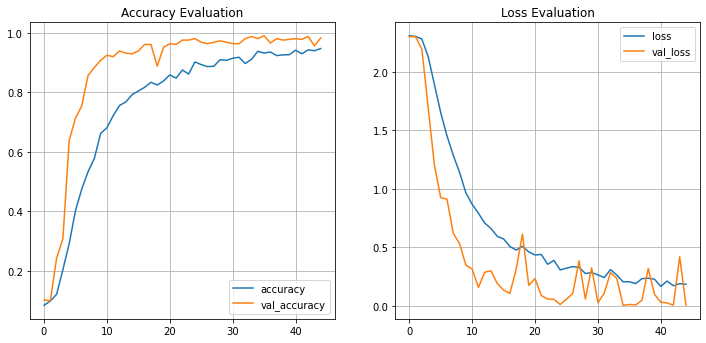

In [20]:
plt.figure(figsize = (12, 12))

plt.subplot(2, 2, 1)
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.legend()
plt.grid()
plt.title("Accuracy Evaluation")

plt.subplot(2, 2, 2)
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.grid()
plt.title("Loss Evaluation")

plt.savefig("model_history.jpg")